# Lunar Lander 

In this notebook we are going to test multiple strategies to solve the Lunar Lander environment from OpenAI Gym.
The algorithms we are going to test are:
- Q-Learning
- Q-Learning with Eligiability Traces
- Q-Learning with Eligibility Traces and Spatial decay
- Deep Q-Learning
- Proximal Policy Optimization

In [1]:
# General libraries
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch

# Custom modules
from utils import *

# Set seed
SEED = 31
np.random.seed(SEED)
torch.manual_seed(SEED)
print(f"Using seed {SEED}")

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using seed 31
Using device: cuda


## The Environment

The Lunar Lander environment is a 2D environment where the agent has to land a spaceship on a landing pad.
The agent has 4 actions available:
- Do nothing
- Fire left orientation engine
- Fire main engine
- Fire right orientation engine

The agent receives a reward of 100 for landing on the landing pad and -100 for crashing. The agent also receives a reward proportional to the fuel used to land the spaceship.

The state space is a 8-dimensional vector with the following components:
- x position
- y position
- x velocity
- y velocity
- angle
- angular velocity
- left leg contact
- right leg contact

The environment is considered solved when the agent reaches an average reward of 200 over 100 episodes.

![Lunar Lander](https://www.gymlibrary.dev/_images/lunar_lander.gif)

In [2]:
import gymnasium as gym

env = gym.make('LunarLander-v3')

DependencyNotInstalled: Box2D is not installed, you can install it by run `pip install swig` followed by `pip install "gymnasium[box2d]"`

### The discretization

In order to utilize the first three algorithms we need to discretize the observation space. We are going to use a simple discretization method where we divide the observation space into a grid of cells. Each cell is going to be represented by a state in the Q-table.

In [ ]:
from discretization import DiscretizeObservationWrapper

env = DiscretizeObservationWrapper(
    env = env,
    n_bins = [3, 3, 6, 6, 4, 6, 2, 2]
)

## The Algorithms

In [ ]:
from Q_agents import QAgent, QLambdaAgent, QSpatialLambdaAgent

n_episodes = 10
horizon = 1_000

### Q-Learning

In [ ]:
params = {
    'env': env,
    'discount_factor': 0.99,
    'initial_epsilon': 1.0,
    'epsilon_decay': 0.995,
    'min_epsilon': 0.01,
    'learning_rate': 0.99,
    'seed': SEED,
}

agent = QAgent(**params)

In [ ]:
rewards_q = agent.learn(n_episodes, horizon)
rewards_q = pd.Series(rewards_q)

Simulating:   0%|          | 0/1000 [00:00<?, ?it/s]

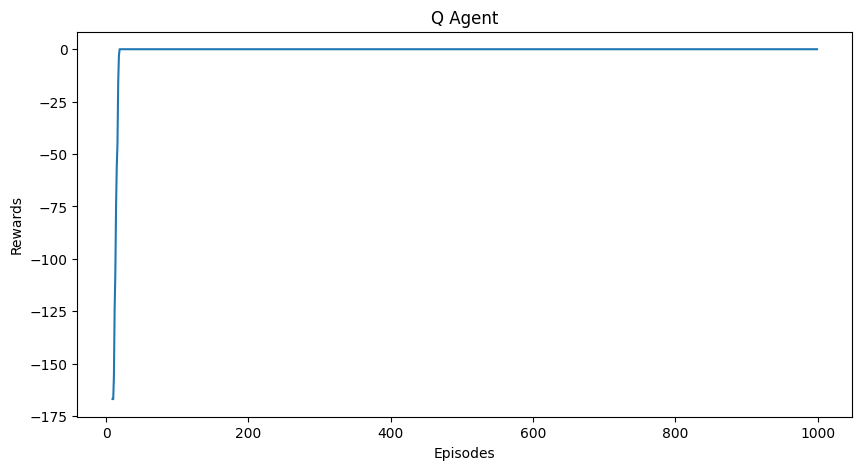

In [ ]:
plot_rewards(rewards_q, title="Q Agent")

### Q-Learning with Eligibility Traces

In [ ]:
params['trace_decay'] = 0.9
agent = QLambdaAgent(**params)

In [ ]:
rewards_ql = agent.learn(n_episodes, horizon)
rewards_ql = pd.Series(rewards_ql)

Simulating:   0%|          | 0/1000 [00:00<?, ?it/s]

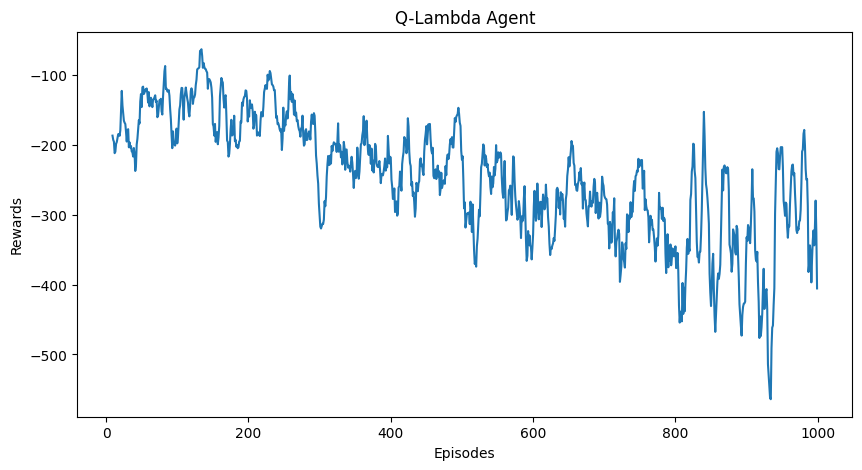

In [ ]:
plot_rewards(rewards_ql, title="Q-Lambda Agent")

### Q-Learning with Eligibility Traces and Spatial decay

In [ ]:
params['kernel'] = lambda x, y: np.exp(-np.linalg.norm(x - y) ** 2 / 2)
agent = QSpatialLambdaAgent(**params)

In [ ]:
rewards_qsl = agent.learn(n_episodes, horizon)
rewards_qsl = pd.Series(rewards_qsl)

Simulating:   0%|          | 0/1000 [00:00<?, ?it/s]

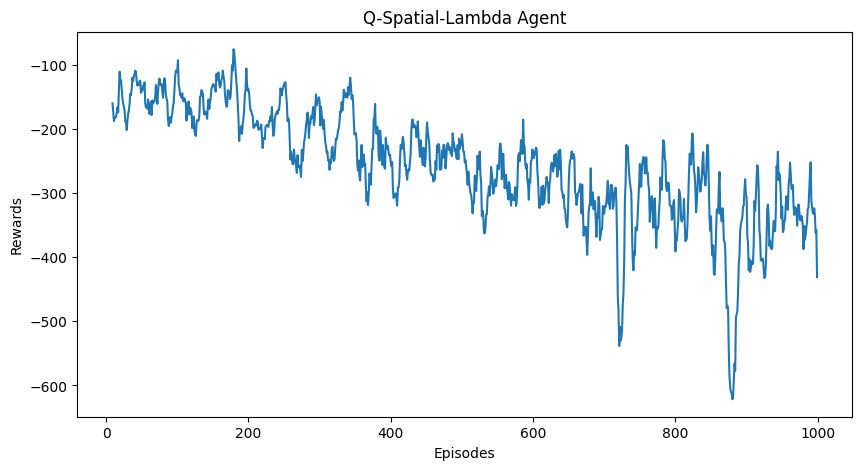

In [ ]:
plot_rewards(rewards_qsl, title="Q-Spatial-Lambda Agent")

### Deep Q-Learning

In [ ]:
agent = DQNAgent(

### Proximal Policy Optimization

## Results